#                              Does Money Make People Happy??

#                              Are The Richer People More Happy??


# Lets Try to find it out, and probably build a model to Predict if richer people are happy if possible.

 We All Know that GDP per Capita (Gross Domestic Product per Capita) of country is Total market value of all the products divided by country's Total population, so  "GDP Per Capita" is a measure of Wealth of an individual in a country on an average, although ignoring disparities
 
 So To denote The wealth of Each person in a country on a average , we use  "GDP Per Capita" as a feature.
 
 And To measure the life satisfaction of a person in a country we use "Better Life Index" as a feature.

We Can get The "GDP Per Capita" dataset from the [IMF WEBSITE](https://www.imf.org/external/pubs/ft/weo/2016/01/weodata/weorept.aspx?pr.x=32&pr.y=8&sy=2015&ey=2015&scsm=1&ssd=1&sort=country&ds=.&br=1&c=512%2C668%2C914%2C672%2C612%2C946%2C614%2C137%2C311%2C962%2C213%2C674%2C911%2C676%2C193%2C548%2C122%2C556%2C912%2C678%2C313%2C181%2C419%2C867%2C513%2C682%2C316%2C684%2C913%2C273%2C124%2C868%2C339%2C921%2C638%2C948%2C514%2C943%2C218%2C686%2C963%2C688%2C616%2C518%2C223%2C728%2C516%2C558%2C918%2C138%2C748%2C196%2C618%2C278%2C624%2C692%2C522%2C694%2C622%2C142%2C156%2C449%2C626%2C564%2C628%2C565%2C228%2C283%2C924%2C853%2C233%2C288%2C632%2C293%2C636%2C566%2C634%2C964%2C238%2C182%2C662%2C453%2C960%2C968%2C423%2C922%2C935%2C714%2C128%2C862%2C611%2C135%2C321%2C716%2C243%2C456%2C248%2C722%2C469%2C942%2C253%2C718%2C642%2C724%2C643%2C576%2C939%2C936%2C644%2C961%2C819%2C813%2C172%2C199%2C132%2C733%2C646%2C184%2C648%2C524%2C915%2C361%2C134%2C362%2C652%2C364%2C174%2C732%2C328%2C366%2C258%2C734%2C656%2C144%2C654%2C146%2C336%2C463%2C263%2C528%2C268%2C923%2C532%2C738%2C944%2C578%2C176%2C537%2C534%2C742%2C536%2C866%2C429%2C369%2C433%2C744%2C178%2C186%2C436%2C925%2C136%2C869%2C343%2C746%2C158%2C926%2C439%2C466%2C916%2C112%2C664%2C111%2C826%2C298%2C542%2C927%2C967%2C846%2C443%2C299%2C917%2C582%2C544%2C474%2C941%2C754%2C446%2C698%2C666&s=NGDPDPC&grp=0&a=#notes)

And The "Better Life Index" dataset from [OCED Website](https://stats.oecd.org/index.aspx?DataSetCode=BLI#)

Lets import necessary libraries

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

# Loading, extracting ,cleaning and preparing Data

Now Lets Load The "Better Life Index" Dataset.

Since The Dataset contain many other information, but we only need the "Life satisfaction" datapoints as it depicts the Better life index.

As we are doing analysis on whole population and not on any particular population group , so we consider
  "INEQUALITY == TOT (TOTAL)",   which considers all population groups (men, women, children , old etc...)

In [5]:
lifeindex = pd.read_csv('betterlifeindex.csv', thousands = ',' )
lifeindex = lifeindex[lifeindex['INEQUALITY'] == 'TOT']
lifeindex = lifeindex[lifeindex['Indicator'] == 'Life satisfaction']
lifeindex = lifeindex.reset_index(drop = True) # Resetting The index as we have extracted datapoints from dataset
lifeindex.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.3,NaN,NaN
1,AUT,Austria,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.1,NaN,NaN
2,BEL,Belgium,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,6.9,NaN,NaN
3,CAN,Canada,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.4,NaN,NaN
4,CZE,Czech Republic,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,6.7,NaN,NaN



Now we Read The "GDP Per Capita" Dataset.

NOTE:: Here the delimiter is '\t' and  Codec = 'latin1'...Dataset won't load without these

In [6]:
gdp_per_capita = pd.read_csv('who_gdp.xls', thousands = ',', delimiter = '\t', encoding = 'latin1')
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


We only need Country and "GDP Per Capita" and "Better life Index" features, so we extract them from respective datasets and set the country as Index

In [7]:
left = gdp_per_capita[['Country','2015']]
left.set_index('Country', inplace = True)
left.head()

,2015
Country,
Afghanistan,599.994
Albania,3995.383
Algeria,4318.135
Angola,4100.315
Antigua and Barbuda,14414.302


In [8]:
right = lifeindex[['Country','Value']]
right.set_index('Country', inplace = True)
right.head()

,Value
Country,
Australia,7.3
Austria,7.1
Belgium,6.9
Canada,7.4
Czech Republic,6.7


Now we need to merge the dataframes horizontally

We use concat function which merges dataframes based on index

In [9]:
data = pd.concat([left,right],join = 'inner', axis = 1)

In [10]:
data.head()

,2015,Value
Country,,
Australia,50961.865,7.3
Austria,43724.031,7.1
Belgium,40106.632,6.9
Brazil,8669.998,6.4
Canada,43331.961,7.4


Lets Rename the columns and sort the values dataframe by GDP values

In [11]:
data = data.rename(columns = {'2015' : 'GDP Per Capita', 'Value' : 'Better Life Index'})
data.sort_values(by = ['GDP Per Capita'], inplace = True)
data.head()

,GDP Per Capita,Better Life Index
Country,,
South Africa,5694.572,4.7
Colombia,6083.510,6.3
Brazil,8669.998,6.4
Mexico,9009.280,6.5
Russia,9054.914,5.8


Lets Round off the GPD Per Capita values and convert them to integers

In [12]:
data['GDP Per Capita'] = data['GDP Per Capita'].apply(lambda x : np.int64(np.ceil(x)))
data.head()

,GDP Per Capita,Better Life Index
Country,,
South Africa,5695,4.7
Colombia,6084,6.3
Brazil,8670,6.4
Mexico,9010,6.5
Russia,9055,5.8


After all the coding above we have finally extracted our required dataset to answer our curious question !!

Now the Dataframe is ready for analysis..and possiblly for prediction if any pattern is found..

# Now let Use Try to find out patterns by visualizing data

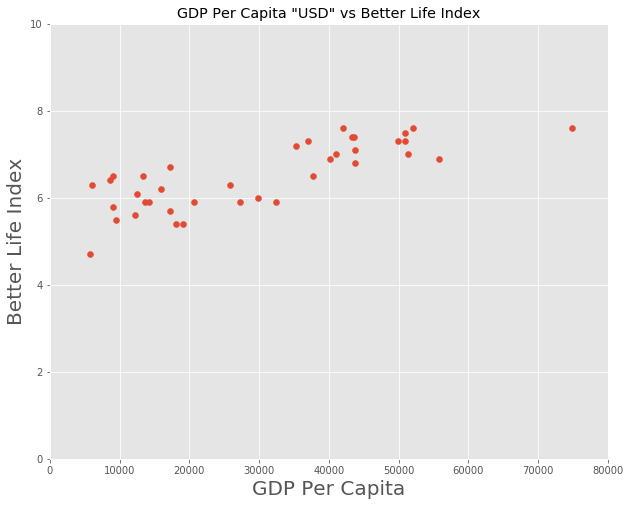

In [13]:
plt.figure(figsize = (10,8))
plt.style.use('ggplot')
plt.title('GDP Per Capita "USD" vs Better Life Index')
plt.xlabel('GDP Per Capita', fontsize = 20)
plt.ylabel('Better Life Index', fontsize = 20)
plt.xlim([0,80000])
plt.ylim([0,10])
plt.scatter(data['GDP Per Capita'], data['Better Life Index'])

Wow, As one might has guessed there exists a pattern between GDP Per Capita and Life Satisfaction indeed!!

Although not perfectly, but The Better Life Index, which indicates Life satisfaction increases linearly with the GDP Per Capita

This implies that on an average , the country whose people are more richer are more satisfied with their life...

Now That we know that There is Linear Relationship between "GDP Per Capita" and "Better Life Index", lets build a Machine learning Model which will be able to Predict The "Life Satisfaction" of an individual in a country , given the GDP of a country.

# Building Machince Learning Model for Predicting Better Life Index

Lets import important libraries first..

In [14]:
import sklearn.linear_model

In [15]:
from sklearn.model_selection import train_test_split

Let us now Create a copy of our data and keep the real data safe

In [16]:
copydata = data.copy()

In [17]:
copydata.shape

(40, 2)

Since There are total 40 training examples, so let us keep 80% data for training set and 20% data for test set

In [18]:
X = np.array(copydata['GDP Per Capita'].values.tolist())
y = np.array(copydata['Better Life Index'].values.tolist())

In [19]:
X = X[:,np.newaxis]
y = y[:,np.newaxis]

We now split the data into Xtrain,Xtest,ytrain and ytest

In [20]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.2,random_state = 0)

Let us fit the linear model to the dataset

In [21]:
model = sklearn.linear_model.LinearRegression()

In [22]:
model.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

The model is now ready...now let us test our model on test set

In [23]:
yprediction = model.predict(Xtest)

Now let us visualize the variation between ytest and the predicted value by model, yprediction

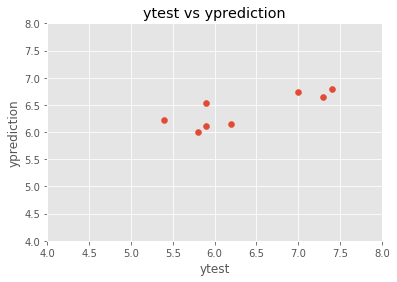

In [24]:
plt.title('ytest vs yprediction')
plt.xlabel('ytest')
plt.ylabel('yprediction')
plt.xlim([4,8])
plt.ylim([4,8])
plt.scatter(ytest,yprediction)

We observe That ytest and ypredicted are very close...This shows that our prediction of better life index is almost equal to real life index on test set

In [25]:
accuracy = model.score(Xtest,ytest)

In [26]:
print('Accuracy = ', accuracy * 100,'%')

Accuracy =  49.47788927947692 %


# Plotting The linear model on the dataset

In [27]:
arr = np.array([np.min(X),np.max(X)])
arr = arr[:,np.newaxis]
#Prediction at these points are
predicted_value = model.predict(arr)

The Accuracy of the model isn't That great, this is because we have only considered GDP as a measure of Life Satisfaction, however there are other features such as employment rate, money distribution accross different groups in a country,health  facilities etc...

However almost 50% accuracy in our model shows the fact that people who are more richer are significantly more satisfied with their lives than people with less money

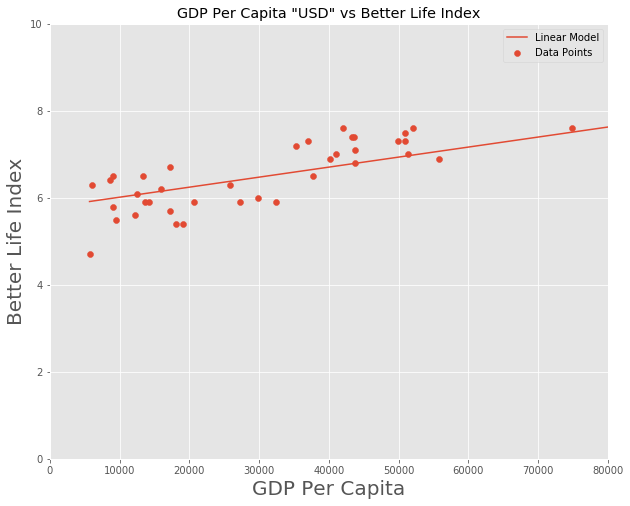

In [28]:
plt.figure(figsize = (10,8))
plt.style.use('ggplot')
plt.title('GDP Per Capita "USD" vs Better Life Index')
plt.xlabel('GDP Per Capita', fontsize = 20)
plt.ylabel('Better Life Index', fontsize = 20)
plt.xlim([0,80000])
plt.ylim([0,10])
plt.scatter(data['GDP Per Capita'], data['Better Life Index'])
plt.plot(arr,predicted_value)
plt.legend(['Linear Model','Data Points'], loc = 'best')